In [486]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from io import StringIO
import seaborn as sns
import plotly.express as px

In [487]:
df = pd.read_excel(r'D:\DATA_SCIENCE_COURSE\Project-2\bankruptcy-prevention (2).xlsx')

In [488]:
# Convert the DataFrame to a CSV string
csv_data = df.to_csv(index=False)

# Read the CSV string into a DataFrame, specifying the separator as ';'
dd = pd.read_csv(StringIO(csv_data), sep=';')

In [489]:
#display columns
dd.columns

Index(['industrial_risk', ' management_risk', ' financial_flexibility',
       ' credibility', ' competitiveness', ' operating_risk',
       ' class,Unnamed: 1'],
      dtype='object')

In [490]:
# Dataset
dd.rename(columns={' class,Unnamed: 1': 'class',' management_risk':'management_risk',' financial_flexibility':'financial_flexibility',' credibility':'credibility',' competitiveness':'competitiveness',' operating_risk':'operating_risk'}, inplace=True)
dd

,industrial_risk,management_risk,financial_flexibility,credibility,competitiveness,operating_risk,class
0,0.5,1.0,0.0,0.0,0.0,0.5,"bankruptcy,"
1,0.0,1.0,0.0,0.0,0.0,1.0,"bankruptcy,"
2,1.0,0.0,0.0,0.0,0.0,1.0,"bankruptcy,"
3,0.5,0.0,0.0,0.5,0.0,1.0,"bankruptcy,"
4,1.0,1.0,0.0,0.0,0.0,1.0,"bankruptcy,"
...,...,...,...,...,...,...,...
245,0.0,1.0,1.0,1.0,1.0,1.0,"non-bankruptcy,"
246,1.0,1.0,0.5,1.0,1.0,0.0,"non-bankruptcy,"
247,0.0,1.0,1.0,0.5,0.5,0.0,"non-bankruptcy,"
248,1.0,0.0,0.5,1.0,0.5,0.0,"non-bankruptcy,"


In [491]:
dd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   industrial_risk        250 non-null    float64
 1   management_risk        250 non-null    float64
 2   financial_flexibility  250 non-null    float64
 3   credibility            250 non-null    float64
 4   competitiveness        250 non-null    float64
 5   operating_risk         250 non-null    float64
 6   class                  250 non-null    object 
dtypes: float64(6), object(1)
memory usage: 13.8+ KB


In [492]:
dd.describe()

,industrial_risk,management_risk,financial_flexibility,credibility,competitiveness,operating_risk
count,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000
mean,0.518000,0.614000,0.376000,0.470000,0.476000,0.570000
std,0.411526,0.410705,0.401583,0.415682,0.440682,0.434575
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.500000,0.000000,0.000000,0.000000,0.000000
50%,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000
75%,1.000000,1.000000,0.500000,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [493]:
print("\nNumber of missing values in each column:")
print(dd.isnull().sum())


Number of missing values in each column:
industrial_risk          0
management_risk          0
financial_flexibility    0
credibility              0
competitiveness          0
operating_risk           0
class                    0
dtype: int64


In [494]:
#finding duplicates
dd.duplicated().sum()

146

In [495]:
int(len(dd.iloc[:,:]))

250

In [496]:
# Create a dictionary to store the count of duplicate values for each column
dup_dict = {}

for col in dd.columns:
    dup_dict[col] = dd.duplicated(subset=[col]).sum()

# Find the column with the most duplicates
max_dups_col = max(dup_dict, key=dup_dict.get)

print(f"The column '{max_dups_col}' has the most duplicate values with {dup_dict[max_dups_col]} duplicates.")

The column 'industrial_risk' has the most duplicate values with 247 duplicates.


In [497]:
# Identify duplicate rows
duplicates = dd[dd.duplicated(keep=False)]

# Randomly select approximately 50% of the duplicates to drop
drop_indices = np.random.choice(duplicates.index, int(len(duplicates)*3/5), replace=False)

# Drop the selected duplicates
dd = dd.drop(drop_indices)

In [498]:
dd.duplicated().sum()

41

In [499]:
int(len(dd.iloc[:,:]))

118

In [500]:
# finding the frequency of values in 'class'
dd['class'].value_counts()

non-bankruptcy,                  73
bankruptcy,                      44
non-bankruptcy,non-bankruptcy     1
Name: class, dtype: int64

# Data Transformation

In [501]:
# Remove symbols,commas, tokens, and characters except alphabets from 'class' column
import re
dd['class'] = dd['class'].apply(lambda x: re.sub(r'[^a-zA-Z.\s]', '', x))
dd['class'].value_counts()

nonbankruptcy                 73
bankruptcy                    44
nonbankruptcynonbankruptcy     1
Name: class, dtype: int64

In [502]:
# This is an Automatic Transformation Operation ,as if any newly entered data is other than 'nonbankruptcy', 'bankruptcy'
# It automatically transform newly entered 'ODD'// misclassified data based on Mode() value
# Calculate the mode of the 'class' column
mode_value = dd['class'].mode()[0]

# Replace values that are not 'nonbankruptcy' or 'bankruptcy' with the mode value
dd.loc[~dd['class'].isin(['nonbankruptcy', 'bankruptcy']), 'class'] = mode_value

dd['class'].value_counts()

nonbankruptcy    74
bankruptcy       44
Name: class, dtype: int64

In [503]:
# Assuming 'df' is your DataFrame

# Create an empty DataFrame to store value counts
value_counts_df = pd.DataFrame()

# List of features
features = ['industrial_risk', 'management_risk', 'financial_flexibility', 'credibility', 'competitiveness', 'operating_risk']

# Calculate value counts for each feature and store in the new DataFrame
for feature in features:
    value_counts_df[feature] = dd[feature].value_counts()

# Display the resulting DataFrame
print(value_counts_df)

     industrial_risk  management_risk  financial_flexibility  credibility  \
0.5               44               35                     33           32   
1.0               41               55                     31           45   
0.0               33               28                     54           41   

     competitiveness  operating_risk  
0.5               26              28  
1.0               50              50  
0.0               42              40  


# Data Visualization

C:\Users\Tirum\AppData\Local\Temp\ipykernel_11956\3725228409.py:2: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



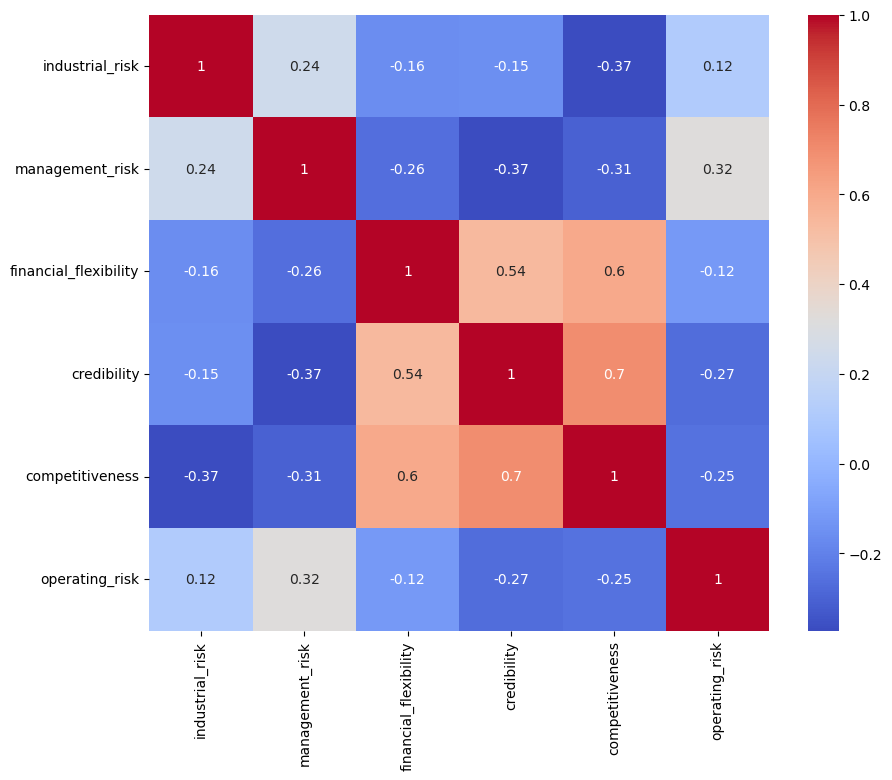

In [504]:
# Calculate correlations
corr = dd.corr()

# Create a heatmap
plt.figure(figsize=(10,8))
sns.heatmap(corr, annot=True, cmap='coolwarm')

plt.show()

In [505]:
# List of features
features = ['industrial_risk', 'management_risk', 'financial_flexibility', 'credibility', 'competitiveness', 'operating_risk']

# Create an influence plot for each feature
for feature in features:
    fig = px.histogram(dd, x=feature, color='class', marginal='violin', title=f'Influence of {feature} on Class')
    fig.show()

###### These feature             1).'financial_flexibility'                2). 'credibility'  3).'competitiveness'              are less influence torward classifying the class of  "bankruptcy"

In [506]:
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler

# Assuming 'df' is your DataFrame with features
features = ['industrial_risk', 'management_risk', 'financial_flexibility', 'credibility', 'competitiveness', 'operating_risk']

# Standardize the data
scaled_data = StandardScaler().fit_transform(dd[features])

# Apply t-SNE
tsne = TSNE(n_components=2, random_state=42)
tsne_result = tsne.fit_transform(scaled_data)

# Create a new DataFrame with the t-SNE result
tsne_dd = pd.DataFrame(data=tsne_result, columns=['TSNE1', 'TSNE2'])

# Add the 'class' column to the new DataFrame
tsne_dd['class'] = dd['class']

# Visualize the result (scatter plot)
fig = px.scatter(tsne_dd, x='TSNE1', y='TSNE2', color='class', title='t-SNE Result')
fig.show()


T-SNE : preserving local relationships and visualizing the inherent structure of your data

In [507]:
dd.columns

Index(['industrial_risk', 'management_risk', 'financial_flexibility',
       'credibility', 'competitiveness', 'operating_risk', 'class'],
      dtype='object')

In [508]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
dd['class']  = le.fit_transform(dd['class'])
dd

,industrial_risk,management_risk,financial_flexibility,credibility,competitiveness,operating_risk,class
2,1.0,0.0,0.0,0.0,0.0,1.0,0
6,1.0,1.0,0.0,0.0,0.0,0.0,0
9,1.0,1.0,0.0,0.5,0.0,1.0,0
10,1.0,1.0,0.5,0.0,0.0,1.0,0
11,0.0,1.0,0.0,0.0,0.0,1.0,0
...,...,...,...,...,...,...,...
231,1.0,1.0,0.5,0.5,1.0,1.0,1
235,0.5,0.5,1.0,0.5,0.5,0.5,1
239,0.5,0.5,1.0,0.5,1.0,0.5,1
240,0.0,1.0,0.5,0.5,0.5,0.0,1


In [509]:
x = dd.drop(columns = ['class'])
y = dd['class']

In [510]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import StratifiedKFold

def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    print(f'Model Evaluation - {type(model).__name__}')
    print(f'Accuracy: {accuracy:.2f}')
    print(f'Precision: {precision:.2f}')
    print(f'Recall: {recall:.2f}')
    print(f'F1 Score: {f1:.2f}')
    print()

In [511]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.23, random_state=43,stratify=y)

In [512]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(max_iter=600)
logreg.fit(x_train,y_train)

LogisticRegression(max_iter=600)

In [513]:
from sklearn.linear_model import Ridge
ridge = Ridge(alpha = 1.0)
ridge.fit(x_train,y_train)

Ridge()

# Logistic Regression

In [514]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'C': [0.01,0.09, 0.1],
    'penalty': ['l1','l2'],
    'max_iter': list(range(500,600,900)),
    'solver': ['saga', 'liblinear']
}

# Create a GridSearchCV object
grid_search = GridSearchCV(logreg, param_grid, cv=5, scoring='accuracy')

# Fit the model to the training data
grid_search.fit(x_train, y_train)

# Print the optimal parameters and best score
print("Best Parameter: {}".format(grid_search.best_params_))

# Get the best model
best_model = grid_search.best_estimator_

# Evaluate the best model
evaluate_model(best_model, x_test, y_test)


Best Parameter: {'C': 0.09, 'max_iter': 500, 'penalty': 'l2', 'solver': 'saga'}
Model Evaluation - LogisticRegression
Accuracy: 1.00
Precision: 1.00
Recall: 1.00
F1 Score: 1.00



# Decsision Tree

In [515]:
from sklearn.tree import DecisionTreeClassifier

# Define the hyperparameter grid
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
}

# Create the Decision Tree model
tree_model = DecisionTreeClassifier(random_state=42)

# Create GridSearchCV object
grid_search = GridSearchCV(tree_model, param_grid, cv=5, scoring='accuracy')

# Fit the grid search to the data
grid_search.fit(x_train, y_train)

# Print the best parameters
print('Best Hyperparameters:', grid_search.best_params_)

# Get the best model
best_tree_model = grid_search.best_estimator_

# Evaluate the best model
evaluate_model(best_tree_model, x_test, y_test)

Best Hyperparameters: {'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2}
Model Evaluation - DecisionTreeClassifier
Accuracy: 1.00
Precision: 1.00
Recall: 1.00
F1 Score: 1.00



In [516]:
from sklearn.ensemble import BaggingClassifier, AdaBoostClassifier, StackingClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

# Bagging (Random Forest)
bagging_model = BaggingClassifier(base_estimator=best_tree_model, n_estimators=100, random_state=42)

# Boosting (AdaBoost)
adaboost_model = AdaBoostClassifier(base_estimator=best_tree_model, n_estimators=100, random_state=42)

# Stacking
stacking_model = VotingClassifier(
    estimators=[
        ('dt', tree_model),
        ('lr', LogisticRegression()),
        ('svm', SVC(probability=True)),
        ('nb', GaussianNB())
    ],
    voting='soft'  # Use soft voting for probability averaging
)

In [517]:
# Train models
bagging_model.fit(x_train, y_train)
adaboost_model.fit(x_train, y_train)
stacking_model.fit(x_train, y_train)


C:\Users\Tirum\anaconda3\lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning:

`base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.

C:\Users\Tirum\anaconda3\lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning:

`base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.



VotingClassifier(estimators=[('dt', DecisionTreeClassifier(random_state=42)),
                             ('lr', LogisticRegression()),
                             ('svm', SVC(probability=True)),
                             ('nb', GaussianNB())],
                 voting='soft')

In [518]:
# Evaluate each model
evaluate_model(bagging_model, x_test, y_test)
evaluate_model(adaboost_model, x_test, y_test)
evaluate_model(stacking_model, x_test, y_test)

Model Evaluation - BaggingClassifier
Accuracy: 1.00
Precision: 1.00
Recall: 1.00
F1 Score: 1.00

Model Evaluation - AdaBoostClassifier
Accuracy: 1.00
Precision: 1.00
Recall: 1.00
F1 Score: 1.00

Model Evaluation - VotingClassifier
Accuracy: 1.00
Precision: 1.00
Recall: 1.00
F1 Score: 1.00



# Random Forest

In [519]:
#Hyperparameter Tuning (Random Forest example)
from sklearn.ensemble import RandomForestClassifier

# Random Forest
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(x_train, y_train)

# Define hyperparameters grid for Random Forest
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create GridSearchCV object
grid_search = GridSearchCV(rf_model, param_grid, cv=5, scoring='accuracy')

# Fit the grid search to the data
grid_search.fit(x_train, y_train)

# Print the best parameters
print('Best Hyperparameters:', grid_search.best_params_)

# Get the best model
best_rf_model = grid_search.best_estimator_

# Evaluate the best model
evaluate_model(best_rf_model, x_test, y_test)

Best Hyperparameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}
Model Evaluation - RandomForestClassifier
Accuracy: 1.00
Precision: 1.00
Recall: 1.00
F1 Score: 1.00



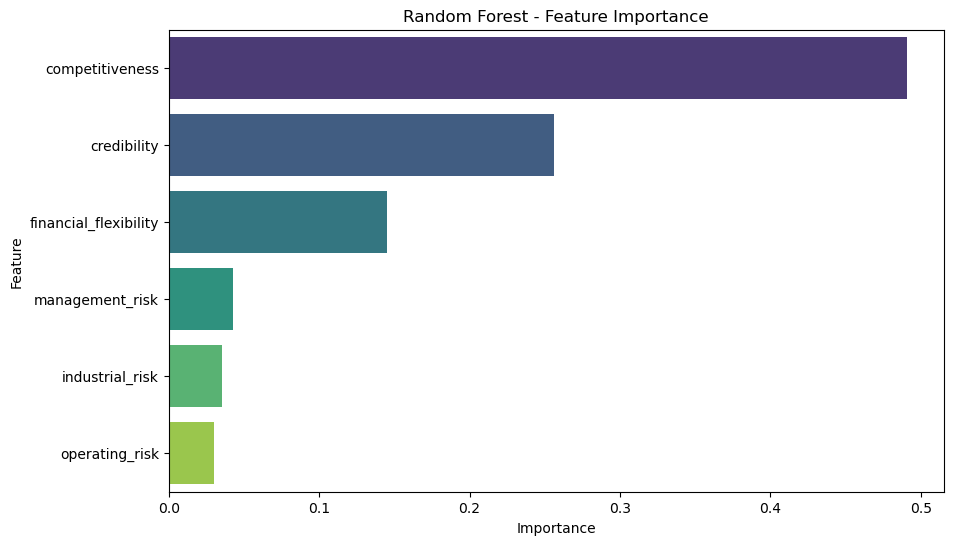

In [520]:
# Random Forest feature importance
feature_importance = pd.DataFrame({'Feature': x.columns, 'Importance': rf_model.feature_importances_})
feature_importance = feature_importance.sort_values(by='Importance', ascending=False)

# Plot feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance, palette='viridis')
plt.title('Random Forest - Feature Importance')
plt.show()

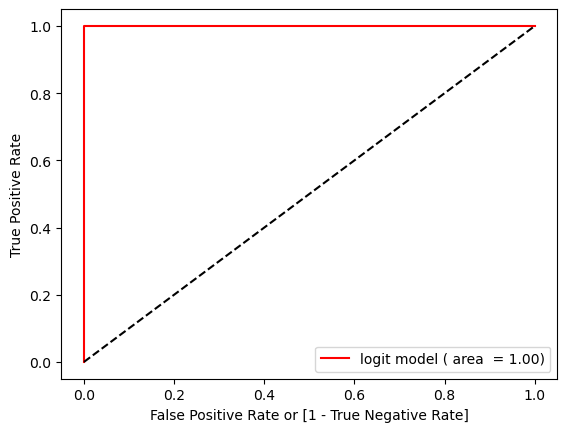

In [527]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

# Predict probabilities for the test data.
probs = best_model.predict_proba(x_test)[:, 1]

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, probs)

# Calculate ROC AUC score
auc = roc_auc_score(y_test, probs)

import matplotlib.pyplot as plt
plt.plot(fpr, tpr, color='red', label='logit model ( area  = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()